In [3]:
from PIL import Image
import io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from numpy import expand_dims
import os
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
import random
import requests
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array 
import zipfile

Upload the data

In [4]:
#load the data
data = tf.keras.utils.image_dataset_from_directory('data') # building pipline 

Found 3670 files belonging to 5 classes.


2022-10-28 10:43:05.351589: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
# tf.keras.utils.image_dataset_from_directory?? # twee vraagtekens achter je import geeft meer informatie.

In [5]:
data_iterator = data.as_numpy_iterator() # access the pipeline and to loop through it.

In [6]:
batch = data_iterator.next() # accessing the data pipeline itself and mixes up data

In [7]:
# batch[1] # images represented as numpy arrays.

In [8]:
len(data.class_names)

5

In [28]:
batch[1] 
# Class 0 = daisy
# Class 1 = dandelion
# Class 2 = roses
# Class 3 = sunflowers
# Class 4 = tulips


array([1, 0, 1, 1, 3, 2, 1, 1, 4, 2, 4, 1, 3, 4, 1, 1, 4, 3, 0, 1, 0, 1,
       4, 4, 1, 4, 4, 2, 1, 4, 2, 3], dtype=int32)

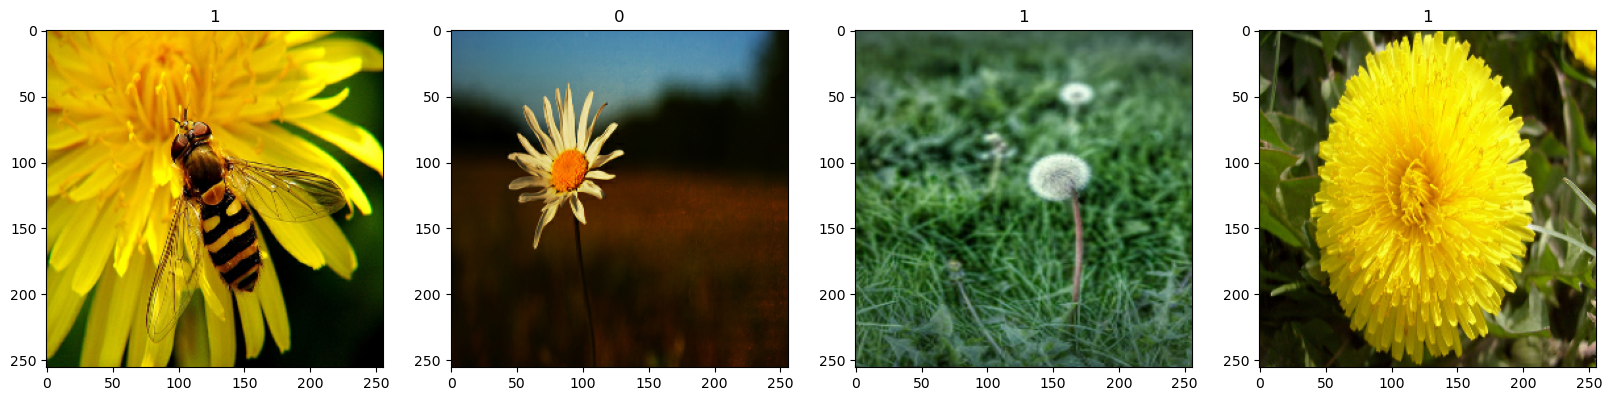

In [33]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

Part 1: scale data

In [12]:
data = data.map(lambda x,y: (x/255, y))

In [13]:
scaledIterator = data.as_numpy_iterator()

In [14]:
batch = scaledIterator.next()

In [32]:
batch[0].max() # check to see the highest value after the scaling /255

1.0

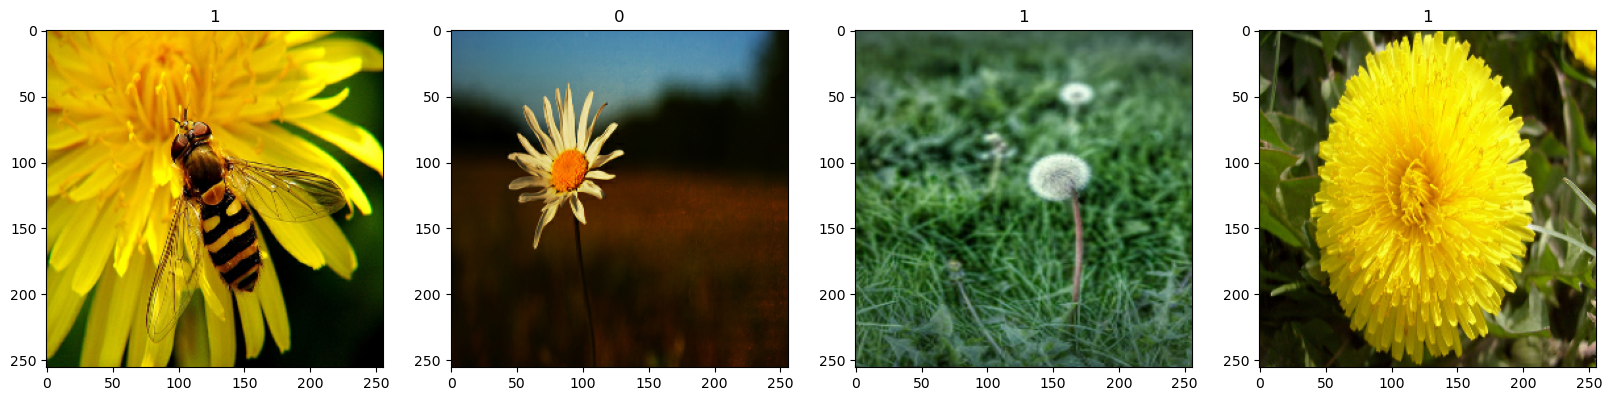

In [16]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

2. Split the data into training, testing and validation data. 
We do this so we can check if we don't overfit the model.

In [17]:
len(data) # gives the number of batches

115

In [18]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [19]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

3. Build the model

In [20]:
model = Sequential()

In [21]:
print(batch[1])

[1 0 1 1 3 2 1 1 4 2 4 1 3 4 1 1 4 3 0 1 0 1 4 4 1 4 4 2 1 4 2 3]


In [38]:
num_classes = 5

model = models.Sequential()

model.add(layers.Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(num_classes)) # outputs

model.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 16)      2320      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 16)        2320      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 16)      

In [ ]:
lossFunction = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
gdAlgorithm = keras.optimizers.Adam(learning_rate=0.001)


In [ ]:
model.compile(optimizer=gdAlgorithm, loss=lossFunction, metrics="accuracy")

In [ ]:
model.summary()


In [36]:
logdir='logs'

In [37]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
# hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()